In [1]:
import orchest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,confusion_matrix

/opt/conda/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Matplotlib is building the font cache; this may take a moment.


In [2]:
data = orchest.get_inputs()
lgbm, pred_lgbm, X_train, y_train, X_test, y_test = data["lgbm"]
cat, pred_cat = data["catboost"]
nb, pred_nb = data["nb"]
rf, pred_rf = data["rf"]

In [3]:
model = VotingClassifier(
    estimators=[("cat", cat), ("RF", rf), ("NB", nb), ("LGBM", lgbm)],
    voting="hard",
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred)
# Check the ROC score of the model
print("AUC score:", auc_score)

AUC score: 0.933109363652914


In [4]:
accuracy_score = accuracy_score(y_test,y_pred)
print("Accuracy Score:",accuracy_score)

Accuracy Score: 0.9327512977819726


### Confusion matrix
Fewer mistakes made by the model and close to perfection.

Text(68.09375, 0.5, 'Actual')

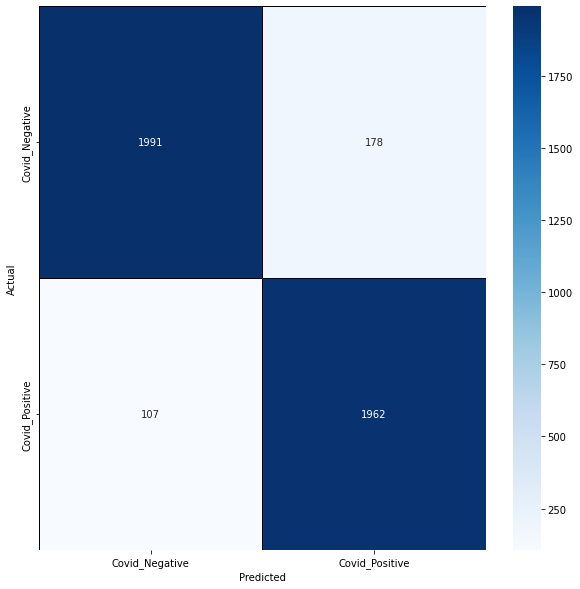

In [5]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    cmap="Blues",
    linecolor="black",
    linewidth=1,
    annot=True,
    fmt="",
    xticklabels=["Covid_Negative", "Covid_Positive"],
    yticklabels=["Covid_Negative", "Covid_Positive"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")


In [6]:
orchest.output((auc_score,accuracy_score),name='ensemble')